# Part 1

In [91]:
# Import needed libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [92]:
# Define utilities functions

def mcol(v):
    return(v.reshape((v.size, 1)))

def mrow(v):
    return (v.reshape((1, v.size)))

In [93]:
# Load training dataset

file_path = r"C:\Users\mathi\Documents\Università\Cybersecurity\SecondYear\SecondSemester\MachineLearningPatternRecognition\Project\trainData.txt"

def loadDataset():

    features = []
    classes  = []

    with open(file_path, 'r') as file:
        for line in file:
            l_features = mcol(np.array([float(i) for i in line.split(',')[:6]]))
            l_class = int(line.split(',')[-1])

            features.append(l_features)
            classes.append(l_class)

    return  np.hstack(features), np.array(classes, dtype=np.int32)

In [94]:
# Compute statistics and plot features

def plotScatter(D, C, f_start):

    D_0 = D[:, C==0]
    D_1 = D[:, C==1]

    hNames = {
        0 : "Feature 1",
        1 : "Feature 2",
        2 : "Feature 3",
        3 : "Feature 4",
        4 : "Feature 5",
        5 : "Feature 6",
    }

    f1 = f_start
    f2 = f1+1
    alpha = 0.4

    plt.figure(figsize=(25, 5))

    plt.subplot(1, 4, 1)
    plt.hist(D_0[f1, :], bins=10, density=True, alpha=alpha, label="Fake")
    plt.hist(D_1[f1, :], bins=10, density=True, alpha=alpha, label="Genuine")
    plt.title(hNames[f1])
    plt.legend()

    plt.subplot(1, 4, 2)
    plt.scatter(D_0[f1, :], D_0[f2, :], label="Fake", s=5, alpha=alpha)
    plt.scatter(D_1[f1, :], D_1[f2, :], label="Genuine", s=5, alpha=alpha)
    plt.xlabel(hNames[f1])
    plt.ylabel(hNames[f2])
    plt.legend()
    
    plt.subplot(1, 4, 3)
    plt.hist(D_0[f2, :], bins=10, density=True, alpha=alpha, label="Fake")
    plt.hist(D_1[f2, :], bins=10, density=True, alpha=alpha, label="Genuine")
    plt.title(hNames[f2])
    plt.legend()
    
    plt.subplot(1, 4, 4)
    plt.scatter(D_0[f2, :], D_0[f1, :], label="Fake", s=5, alpha=alpha)
    plt.scatter(D_1[f2, :], D_1[f1, :], label="Genuine", s=5, alpha=alpha)
    plt.xlabel(hNames[f2])
    plt.ylabel(hNames[f1])
    plt.legend()

    plt.show()

def computeStatistics(D, C, f_start):

    D_0 = D[:, C==0]
    D_1 = D[:, C==1]

    mean_c0 = D_0.mean(1)
    mean_c1 = D_1.mean(1)

    var_c0 = D_0.var(1)
    var_c1 = D_1.var(1)

    print(f'Features: {f_start+1}-{f_start+2}')
    print(f'Class C0')
    print(f'Feature {f_start}: Mean: {mean_c0[f_start]:.4f} - Variance: {var_c0[f_start]:.4f}')
    print(f'Feature {f_start+1}: Mean: {mean_c0[f_start+1]:.4f} - Variance: {var_c0[f_start+1]:.4f}')
    print(f'Class C1')
    print(f'Feature {f_start}: Mean: {mean_c1[f_start]:.4f} - Variance: {var_c1[f_start]:.4f}')
    print(f'Feature {f_start+1}: Mean: {mean_c1[f_start+1]:.4f} - Variance: {var_c1[f_start+1]:.4f}')

Features: 1-2
Class C0
Feature 0: Mean: 0.0029 - Variance: 0.5696
Feature 1: Mean: 0.0187 - Variance: 1.4209
Class C1
Feature 0: Mean: 0.0005 - Variance: 1.4302
Feature 1: Mean: -0.0085 - Variance: 0.5783


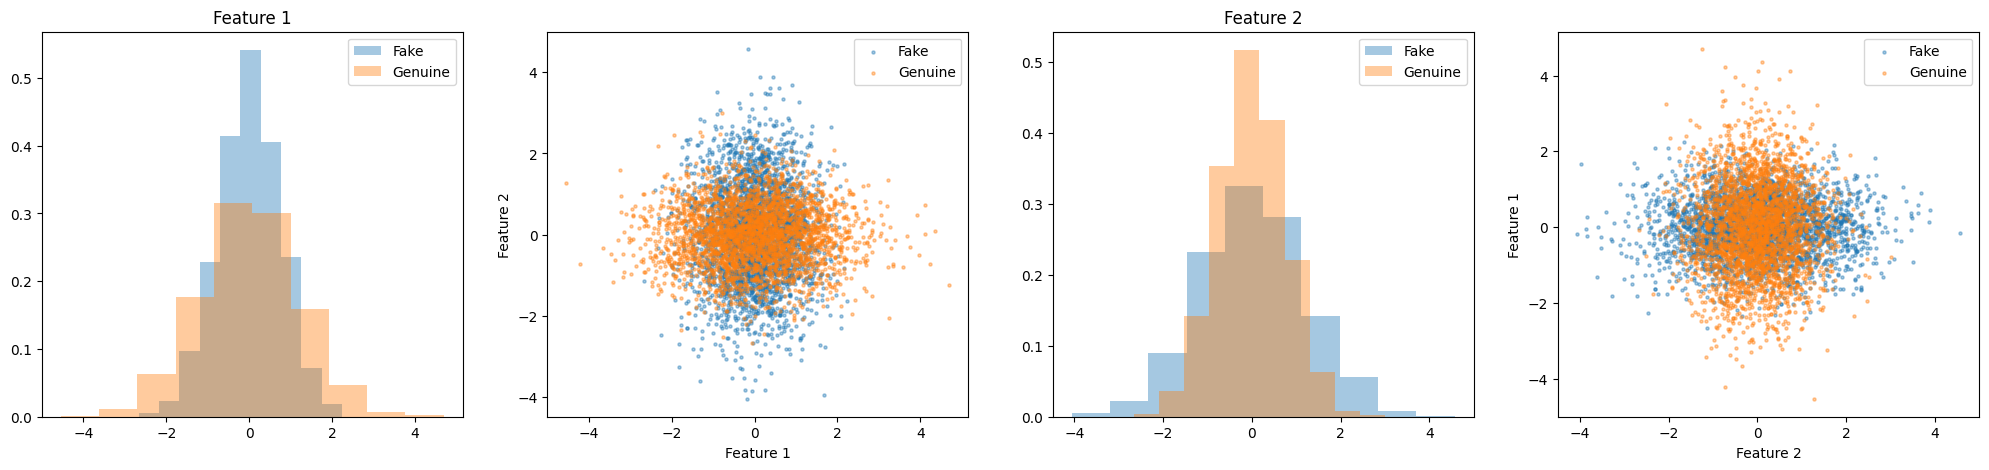

Features: 3-4
Class C0
Feature 2: Mean: -0.6809 - Variance: 0.5500
Feature 3: Mean: 0.6708 - Variance: 0.5360
Class C1
Feature 2: Mean: 0.6652 - Variance: 0.5489
Feature 3: Mean: -0.6642 - Variance: 0.5533


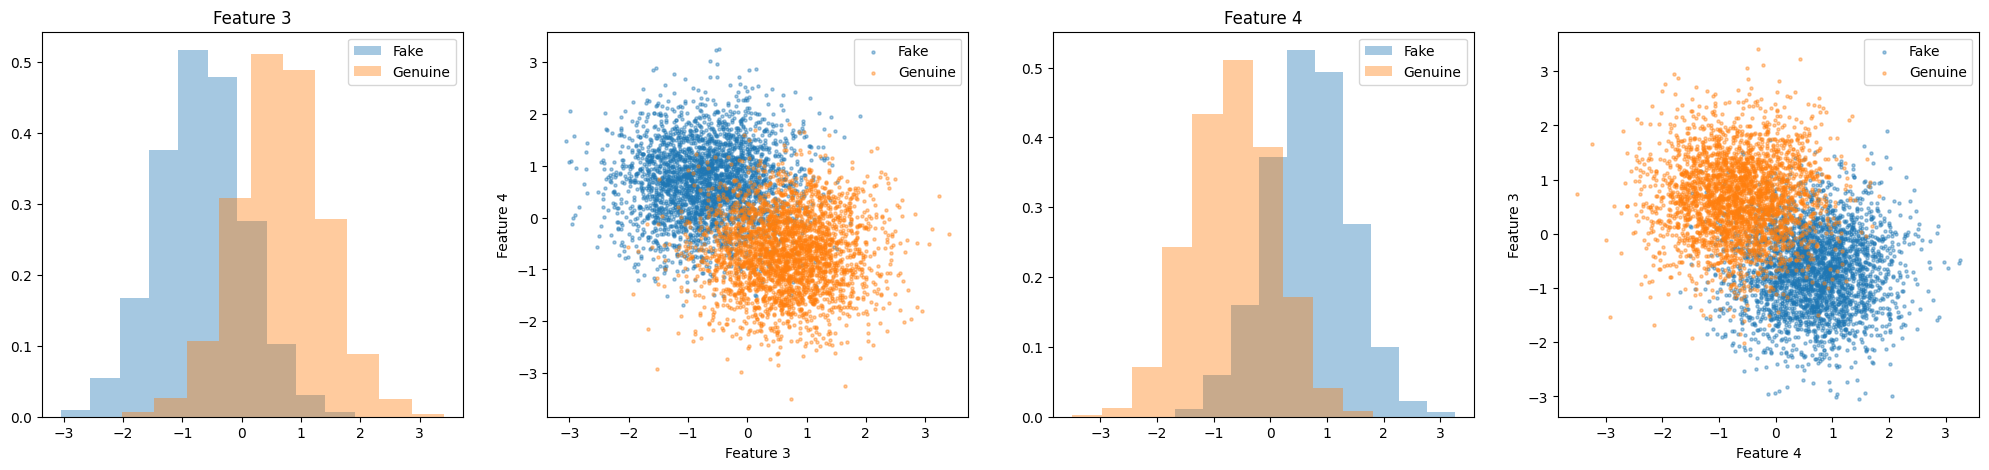

Features: 5-6
Class C0
Feature 4: Mean: 0.0280 - Variance: 0.6801
Feature 5: Mean: -0.0058 - Variance: 0.7050
Class C1
Feature 4: Mean: -0.0417 - Variance: 1.3178
Feature 5: Mean: 0.0239 - Variance: 1.2870


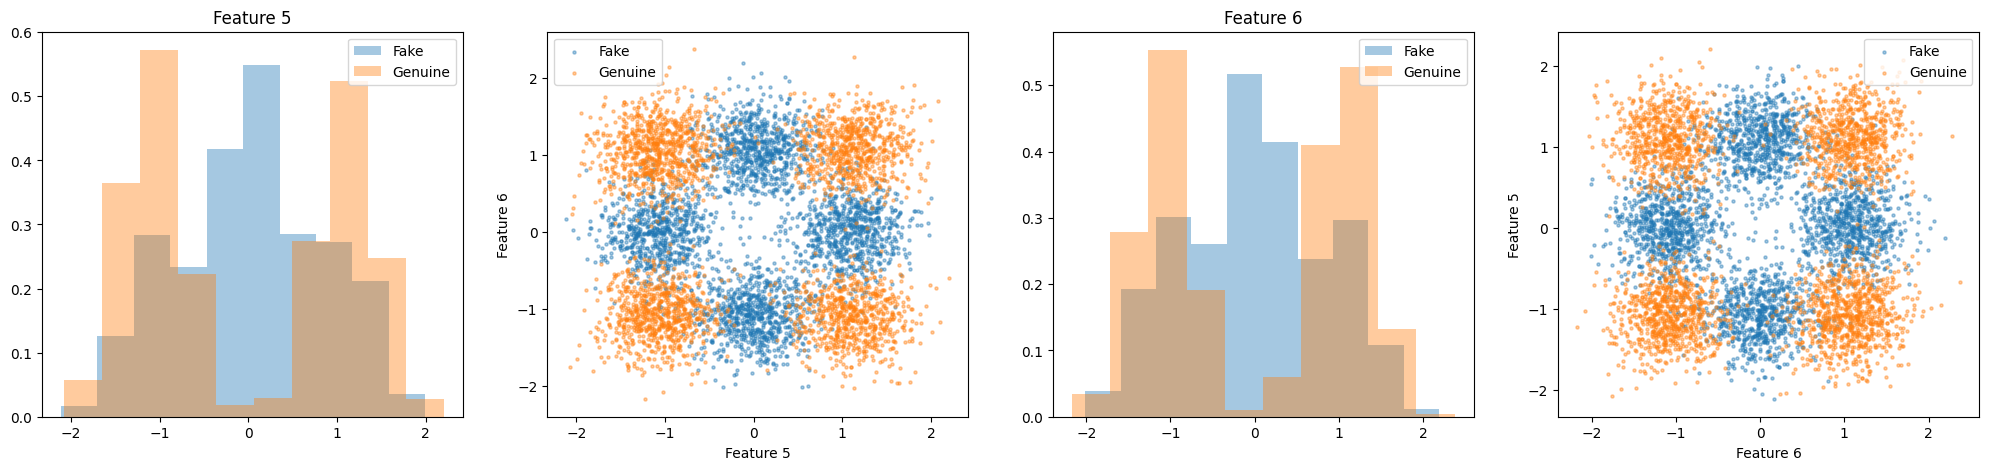

In [95]:
# Load dataset and do the work required for part 1
features, classes = loadDataset()

f_start = 1 # 1-2
computeStatistics(features, classes, f_start-1)
plotScatter(features, classes, f_start-1)

f_start = 3 # 3-4
computeStatistics(features, classes, f_start-1)
plotScatter(features, classes, f_start-1)


f_start = 5 # 5-6
computeStatistics(features, classes, f_start-1)
plotScatter(features, classes, f_start-1)

# Part 2

In [96]:
# Define PCA and LDA functions

# Function to perform Principal Component Analysis on a dataset
def PCA(D, m=2, project=True):

    # Calculate mean over columns of dataset
    mu = D.mean(1)

    # Center the data of the dataset
    # Subtract the mean vector reshaped to the dataset
    mu = mcol(mu)
    DC = D - mu

    # Calculate covariance matrix
    C = (DC @ DC.T) / float(D.shape[1])

    # Calculate eigenvector and eigenvalues
    # Using np.linalg.eigh since C is symmetric
    _, U = np.linalg.eigh(C)

    # Retrieve the m leading eigenvectors
    P = U[:, ::-1][:, 0:m]

    return np.dot(P.T, D) if project else P

# Function to perform Linear Discriminant Analysis on a dataset
def LDA(D, L, m=2, project=True):

    # We need to calculate the Sb matrix 
    mu = mcol(D.mean(1))

    distintClasses = set(L)
    
    Sb = 0
    Sw = 0

    for i in distintClasses:
        D_f = D[:, L==i]
        mu_f = mcol(D_f.mean(1))
        Sb += (D_f.shape[1]) * np.dot((mu_f - mu), (mu_f - mu).T)
        DC = D_f - mu_f
        Sw += np.dot(DC, DC.T)
    Sb /= D.shape[1]
    Sw /= D.shape[1]

    # Using Genralized eigenvalue problem
    return GEP(D, Sb, Sw, m, project)

def GEP(D, Sb, Sw, m, project=True):

    # Sb*w = lambda*Sw*w
    s, U = scipy.linalg.eigh(Sb, Sw)
    W = U[:, ::-1][:, 0:m]

    return np.dot(W.T, D) if project else W

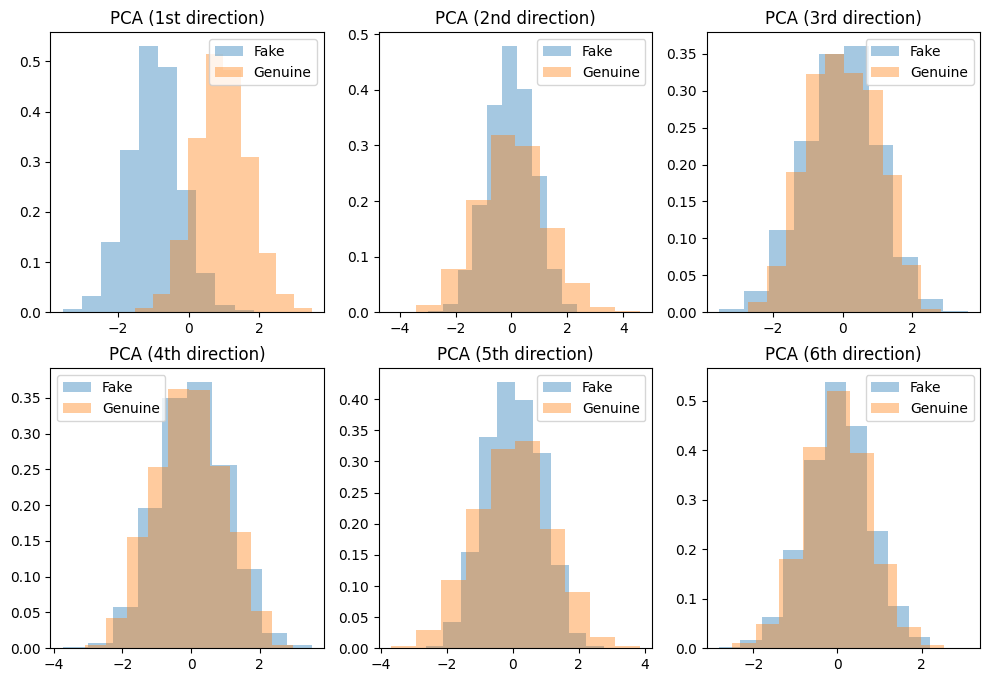

In [97]:
# Compute PCA over the whole dimensionality
PCA_features = PCA(features, 6)

PCA_0 = PCA_features[:, classes == 0]
PCA_1 = PCA_features[:, classes == 1]

# Plot all the PCA directions
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# PCA 1st direction
axs[0, 0].hist(PCA_0[0, :], bins=10, density=True, alpha=0.4, label="Fake")
axs[0, 0].hist(PCA_1[0, :], bins=10, density=True, alpha=0.4, label="Genuine")
axs[0, 0].set(title="PCA (1st direction)")
axs[0, 0].legend()

# PCA 2nd direction
axs[0, 1].hist(PCA_0[1, :], bins=10, density=True, alpha=0.4, label="Fake")
axs[0, 1].hist(PCA_1[1, :], bins=10, density=True, alpha=0.4, label="Genuine")
axs[0, 1].set(title="PCA (2nd direction)")
axs[0, 1].legend()

# PCA 3rd direction
axs[0, 2].hist(PCA_0[2, :], bins=10, density=True, alpha=0.4, label="Fake")
axs[0, 2].hist(PCA_1[2, :], bins=10, density=True, alpha=0.4, label="Genuine")
axs[0, 2].set(title="PCA (3rd direction)")
axs[0, 2].legend()

# PCA 4th direction
axs[1, 0].hist(PCA_0[3, :], bins=10, density=True, alpha=0.4, label="Fake")
axs[1, 0].hist(PCA_1[3, :], bins=10, density=True, alpha=0.4, label="Genuine")
axs[1, 0].set(title="PCA (4th direction)")
axs[1, 0].legend()

# PCA 5th direction
axs[1, 1].hist(PCA_0[4, :], bins=10, density=True, alpha=0.4, label="Fake")
axs[1, 1].hist(PCA_1[4, :], bins=10, density=True, alpha=0.4, label="Genuine")
axs[1, 1].set(title="PCA (5th direction)")
axs[1, 1].legend()

# PCA 6th direction
axs[1, 2].hist(PCA_0[5, :], bins=10, density=True, alpha=0.4, label="Fake")
axs[1, 2].hist(PCA_1[5, :], bins=10, density=True, alpha=0.4, label="Genuine")
axs[1, 2].set(title="PCA (6th direction)")
axs[1, 2].legend()


plt.show()

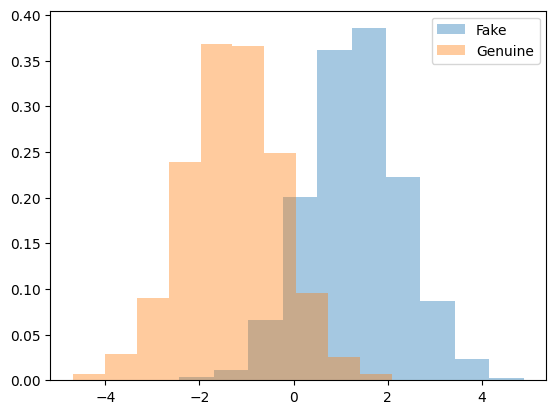

In [98]:
# Compute LDA 1 dimensional over the dataset
LDA_features = LDA(features, classes, 1)

LDA_0 = LDA_features[:, classes == 0]
LDA_1 = LDA_features[:, classes == 1]

#Plot the histogram
plt.figure()

# LDA 1st direction
plt.hist(LDA_0[0, :], bins=10, density=True, alpha=0.4, label="Fake")
plt.hist(LDA_1[0, :], bins=10, density=True, alpha=0.4, label="Genuine")
plt.legend()

plt.show()

In [99]:
# Define function to split the dataset into training and validation
def split_db_2to1(D, L, seed=0):

    nTrain = int(D.shape[1] * 2.0 / 3.0)
    np.random.seed(seed)
    idx = np.random.permutation(D.shape[1])
    idxTrain = idx[0:nTrain]
    idxTest = idx[nTrain:]

    DTR = D[:, idxTrain]
    DVAL = D[:, idxTest]
    LTR = L[idxTrain]
    LVAL = L[idxTest]

    return (DTR, LTR), (DVAL, LVAL)

# Define function to calculate threshold
def calculateThresh(DTR, LTR, DVAL, LVAL):

    # Set a threshold for the classification (over 1st dimension)
    threshold = (DTR[0, LTR==0].mean() + DTR[0, LTR==1].mean()) / 2.0

    # Try finding optimal threshold
    bestErrorRate = 100
    bestThreshold = 0.0
    for i in np.arange(-1, 1, 0.001):

        threshold = i

        # Compare to the threshold
        PVAL = np.zeros(shape = LVAL.shape, dtype=np.int32)
        PVAL[DVAL[0] >= threshold] = 1
        PVAL[DVAL[0]  < threshold] = 0

        cntErr = 0
        for i in range(len(LVAL)):
            if LVAL[i] != PVAL[i]:
                cntErr += 1

        errorRate = cntErr * 100 / len(LVAL)
        if errorRate < bestErrorRate:
            bestErrorRate = errorRate
            bestThreshold = threshold

    print(f'Error rate: {bestErrorRate}')
    print(f'Threshold used: {bestThreshold}')

In [100]:
# Define plotting function fot TR and VAL datasets
def plotAll(DTR_lda, DVAL_lda, LTR, LVAL):
    
    DTR_1 = DTR_lda[:, LTR==0]
    DTR_2 = DTR_lda[:, LTR==1]
    
    DVAL_1 = DVAL_lda[:, LVAL==0]
    DVAL_2 = DVAL_lda[:, LVAL==1]

    fig, axs = plt.subplots(1, 2, figsize=(12, 8))

    # Training dataset 1st direction
    axs[0].hist(DTR_1[0, :], bins=5, density=True, alpha=0.4)
    axs[0].hist(DTR_2[0, :], bins=5, density=True, alpha=0.4)
    axs[0].set(title="Model training set (DTR, LTR)")

    # Validation dataset 1st direction
    axs[1].hist(DVAL_1[0, :], bins=5, density=True, alpha=0.4)
    axs[1].hist(DVAL_2[0, :], bins=5, density=True, alpha=0.4)
    axs[1].set(title="Model validation set (DVAL, LVAL)")

    plt.show()

In [101]:
# DTR and LTR are model training data and labels
# DVAL and LVAL are validation data and labels
(DTR, LTR), (DVAL, LVAL) = split_db_2to1(features, classes)

# Doing LDA over training set, without projecting
W = LDA(DTR, LTR, m=1, project=False)

# Project training set
DTR_lda = np.dot(W.T, DTR)

# Project validation set
DVAL_lda = np.dot(W.T, DVAL)

# Plot training vs validation histogram
# plotAll(DTR_lda, DVAL_lda, LTR, LVAL)

calculateThresh(DTR_lda, LTR, DVAL_lda, LVAL)

Error rate: 9.05
Threshold used: -0.1059999999999992


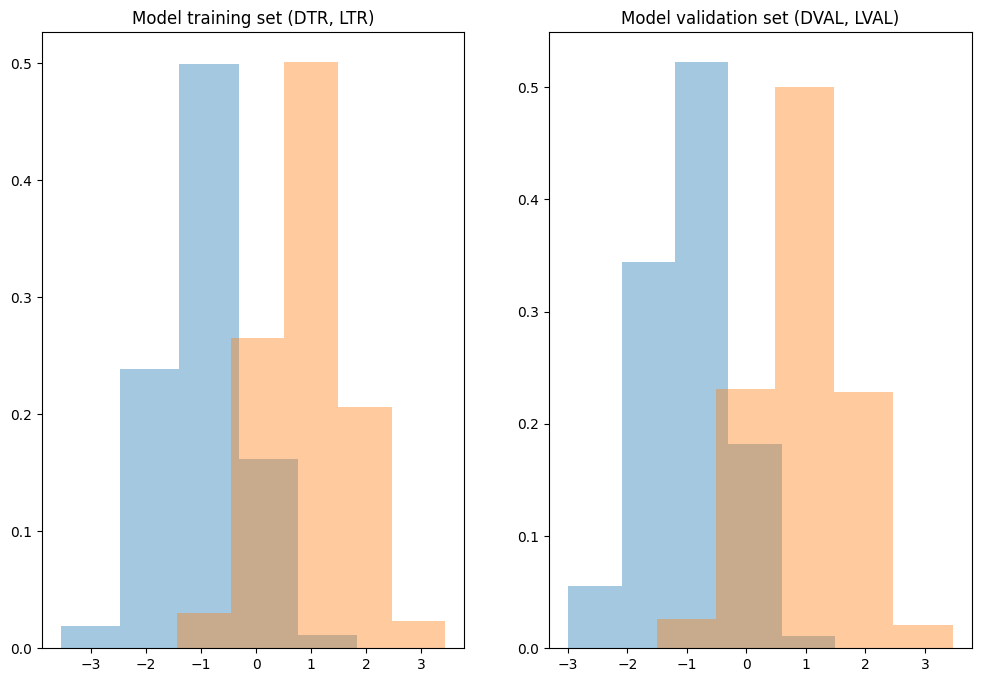

Error rate: 80.25
Threshold used: -1.0


In [102]:
# PCA before, then LDA
U_pca = PCA(DTR, m=2, project=False)
DTR_pca = np.dot(U_pca.T, DTR)
DVAL_pca = np.dot(U_pca.T, DVAL)

U_lda = LDA(DTR_pca, LTR, m=1, project=False)
DTR_lda = np.dot(U_lda.T, DTR_pca)
DVAL_lda = np.dot(U_lda.T, DVAL_pca)

# Plot training vs validation histogram
plotAll(DTR_pca, DVAL_pca, LTR, LVAL)

calculateThresh(DTR_lda, LTR, DVAL_lda, LVAL)

PCA + LDA

m = 1
Error rate: 8.85
Threshold used: +0.013

m = 2
Error rate: 8.95
Threshold used: -0.033

m = 3
Error rate: 9.15
Threshold used: -0.057

m = 4
Error rate: 9.1
Threshold used: -0.062

m = 5
Error rate: 9.05
Threshold used: -0.095

m = 6
Error rate: 9.05
Threshold used: -0.106

# Part 3

In [103]:
def logpdf_GAU_ND(X, mu, C):
    M = mu.shape[0]
    
    # Inverse and log-determinant of covariance matrix
    C_inv = np.linalg.inv(C)
    _, log_det_C = np.linalg.slogdet(C)
    
    # Adjust for the constant terms (2π)^(-M/2) and other constants
    const_term = -0.5 * M * np.log(2 * np.pi) - 0.5 * log_det_C
    
    # Reshape mu for broadcasting
    mu = mu.reshape(-1, 1)
    
    # Compute the quadratic term for all samples
    # (X - mu) is of shape (M, N), C_inv is (M, M), resulting shape will be (M, N)
    diffs = X - mu
    quadratic_term = np.sum(diffs * (C_inv @ diffs), axis=0)
    
    # Compute log densities
    log_densities = const_term - 0.5 * quadratic_term
    
    return log_densities

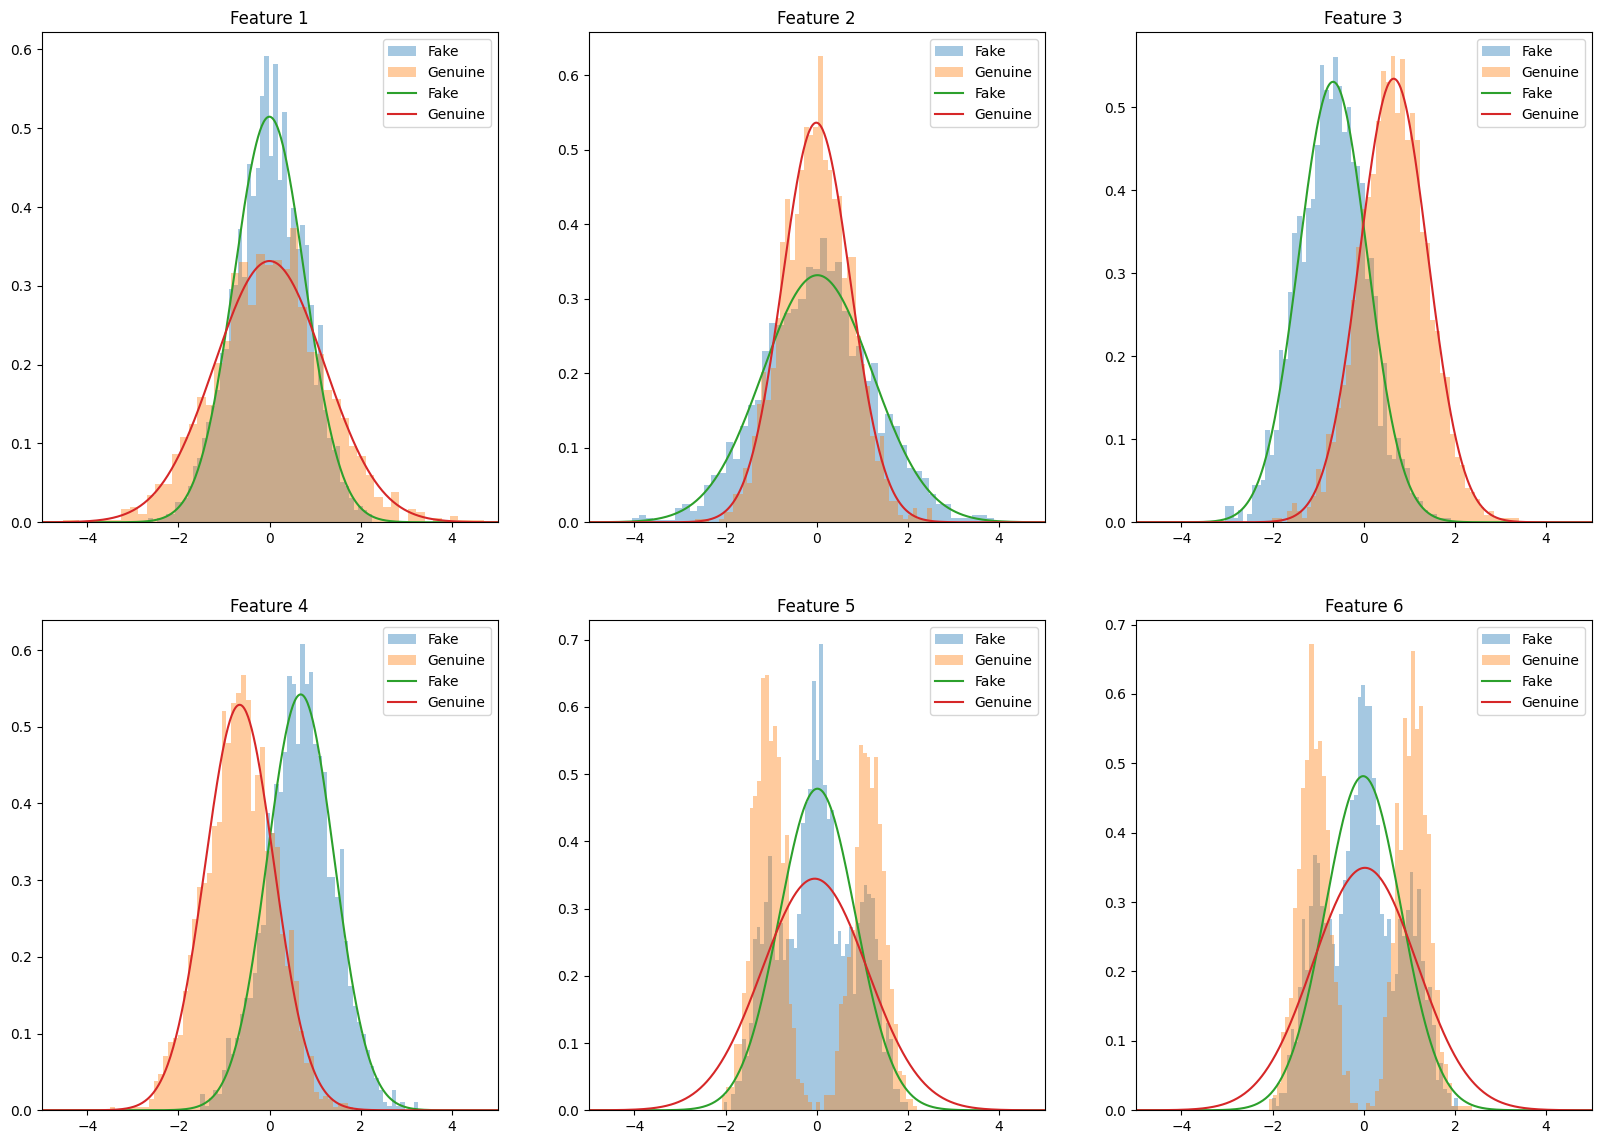

In [104]:

plt.figure(figsize=(20, 14))
for i in range(6):
    DTR_0 = DTR[:, LTR==0][i:i+1]
    DTR_1 = DTR[:, LTR==1][i:i+1]

    # Calculate mean over columns of dataset
    mu_0 = DTR_0.mean(1)
    mu_1 = DTR_1.mean(1)

    # Center the data of the dataset
    # Subtract the mean vector reshaped to the dataset
    m_ML_0 = mcol(mu_0)
    m_ML_1 = mcol(mu_1)
    DTRC_0 = DTR_0 - mu_0
    DTRC_1 = DTR_1 - mu_1

    # Calculate covariance matrix
    C_ML_0 = (DTRC_0 @ DTRC_0.T) / DTR_0.shape[1]
    C_ML_1 = (DTRC_1 @ DTRC_1.T) / DTR_1.shape[1]

    XPlot = np.linspace(-8, 12, 1000)

    plt.subplot(2, 3, i+1)
    plt.hist(DTR_0.ravel(), bins=50, density=True, alpha=0.4, label="Fake")
    plt.hist(DTR_1.ravel(), bins=50, density=True, alpha=0.4, label="Genuine")
    plt.plot(XPlot.ravel(), np.exp(logpdf_GAU_ND(mrow(XPlot), m_ML_0, C_ML_0)), label="Fake")
    plt.plot(XPlot.ravel(), np.exp(logpdf_GAU_ND(mrow(XPlot), m_ML_1, C_ML_1)), label="Genuine")

    plt.xlim(-5, 5)
    plt.title(f'Feature {i+1}')
    plt.legend()

plt.show()

# Part 5

In [105]:
# MVG

D_0 = DTR[:, LTR == 0]
mu_0 = mcol(D_0.mean(1))
C_0 = ((D_0 - mu_0) @ (D_0 - mu_0).T) / D_0.shape[1]

D_1 = DTR[:, LTR == 1]
mu_1 = mcol(D_1.mean(1))
C_1 = ((D_1 - mu_1) @ (D_1 - mu_1).T) / D_1.shape[1]

# Compute log likelihoods of each class for each test sample
S_0 = np.exp(logpdf_GAU_ND(DVAL, mu_0, C_0))
S_1 = np.exp(logpdf_GAU_ND(DVAL, mu_1, C_1))

S = np.array([S_0, S_1])

# Assume prior prob is 1/2
Pc = 1/2

# Compute the joint distribution for samples and classes into SJoint matrix
# Assume prior probability is 1/3 for all classes
logS_2= np.log(S)
logSJoint_2 = logS_2 + mcol(np.log(Pc))  
llrs_MVG = logSJoint_2[1] - logSJoint_2[0]

# assume threshold = 0
thresh = 0

# Create the predictions based on the value of the llrs respect to the threshold
L_final = np.where(llrs_MVG >= thresh, 1, 0)

# Compute accuracy and error rate
acc = np.sum((L_final - LVAL) == 0) / LVAL.size
err = 1 - acc

print(f"MVG Error rate is {round(err * 100, 4)} %")

print("Covariance class 0:")
print(C_0)
print("Covariance class 1:")
print(C_1)

MVG Error rate is 7.0 %
Covariance class 0:
[[ 6.00956506e-01  5.15866517e-05  1.90589145e-02  1.92529876e-02
   1.28039402e-02 -1.34721598e-02]
 [ 5.15866517e-05  1.44722543e+00 -1.61340110e-02 -1.58561474e-02
  -2.64529141e-02  2.29139833e-02]
 [ 1.90589145e-02 -1.61340110e-02  5.65348901e-01 -1.84344435e-03
  -6.91446277e-03  1.68928322e-02]
 [ 1.92529876e-02 -1.58561474e-02 -1.84344435e-03  5.41615202e-01
   5.25171375e-03  1.35717775e-02]
 [ 1.28039402e-02 -2.64529141e-02 -6.91446277e-03  5.25171375e-03
   6.96067641e-01  1.58438399e-02]
 [-1.34721598e-02  2.29139833e-02  1.68928322e-02  1.35717775e-02
   1.58438399e-02  6.86519710e-01]]
Covariance class 1:
[[ 1.44809527e+00 -1.47222433e-02  5.57010301e-03  1.57415883e-02
   1.94971163e-02 -1.76682539e-04]
 [-1.47222433e-02  5.53390796e-01 -1.12168681e-02 -9.06473359e-03
  -1.46589901e-02  1.63492048e-02]
 [ 5.57010301e-03 -1.12168681e-02  5.57480229e-01  2.75609663e-02
  -3.76966451e-03 -1.45976943e-02]
 [ 1.57415883e-02 -9.06473

In [106]:
# TIED MVG

D_0 = DTR[:, LTR == 0]
mu_0 = mcol(D_0.mean(1))
C_0 = ((D_0 - mu_0) @ (D_0 - mu_0).T) / D_0.shape[1]

D_1 = DTR[:, LTR == 1]
mu_1 = mcol(D_1.mean(1))
C_1 = ((D_1 - mu_1) @ (D_1 - mu_1).T) / D_1.shape[1]

C_tied = 1/2 * (C_0 + C_1)

# Compute log likelihoods of each class for each test sample
S_0 = np.exp(logpdf_GAU_ND(DVAL, mu_0, C_tied))
S_1 = np.exp(logpdf_GAU_ND(DVAL, mu_1, C_tied))

S = np.array([S_0, S_1])

# Assume prior prob is 1/2
Pc = 1/2

# Compute the joint distribution for samples and classes into SJoint matrix
# Assume prior probability is 1/3 for all classes
logS_2= np.log(S)
logSJoint_2 = logS_2 + mcol(np.log(Pc))  
llrs_TMVG= logSJoint_2[1] - logSJoint_2[0]

# assume threshold = 0
thresh = 0

# Create the predictions based on the value of the llrs respect to the threshold
L_final = np.where(llrs_TMVG >= thresh, 1, 0)

# Compute accuracy and error rate
acc = np.sum((L_final - LVAL) == 0) / LVAL.size
err = 1 - acc

print(f"Tied Error rate is {round(err * 100, 4)} %")


Tied Error rate is 9.3 %


In [107]:
# Naive Bayes

D_0 = DTR[:, LTR == 0]
mu_0 = mcol(D_0.mean(1))
C_0 = ((D_0 - mu_0) @ (D_0 - mu_0).T) / D_0.shape[1]

D_1 = DTR[:, LTR == 1]
mu_1 = mcol(D_1.mean(1))
C_1 = ((D_1 - mu_1) @ (D_1 - mu_1).T) / D_1.shape[1]

# Zero all the non-diagonal values of the MVG ML solution
C_0_NB = C_0 * np.eye(C_0.shape[0], C_0.shape[1])
C_1_NB = C_1 * np.eye(C_1.shape[0], C_1.shape[1])

# Compute log likelihoods of each class for each test sample
S_0 = np.exp(logpdf_GAU_ND(DVAL, mu_0, C_0_NB))
S_1 = np.exp(logpdf_GAU_ND(DVAL, mu_1, C_1_NB))

S = np.array([S_0, S_1])

# Assume prior prob is 1/2
Pc = 1/2

# Compute the joint distribution for samples and classes into SJoint matrix
# Assume prior probability is 1/3 for all classes
logS_2= np.log(S)
logSJoint_2 = logS_2 + mcol(np.log(Pc))  
llrs_NB = logSJoint_2[1] - logSJoint_2[0]

# assume threshold = 0
thresh = 0

# Create the predictions based on the value of the llrs respect to the threshold
L_final = np.where(llrs_NB >= thresh, 1, 0)

# Compute accuracy and error rate
acc = np.sum((L_final - LVAL) == 0) / LVAL.size
err = 1 - acc

print(f"Naive Bayes Error rate is {round(err * 100, 4)} %")

Naive Bayes Error rate is 7.2 %


In [108]:
# Pearson correlation coefficient

Corr_0 = C_0 / ( mcol(C_0.diagonal()**0.5) * mrow(C_0.diagonal()**0.5) )
Corr_1 = C_1 / ( mcol(C_1.diagonal()**0.5) * mrow(C_1.diagonal()**0.5) )

print(f"Pearson CC class 0:\n {Corr_0.round(decimals=2)}")
print(f"Pearson CC class 1:\n {Corr_1.round(decimals=2)}")

Pearson CC class 0:
 [[ 1.    0.    0.03  0.03  0.02 -0.02]
 [ 0.    1.   -0.02 -0.02 -0.03  0.02]
 [ 0.03 -0.02  1.   -0.   -0.01  0.03]
 [ 0.03 -0.02 -0.    1.    0.01  0.02]
 [ 0.02 -0.03 -0.01  0.01  1.    0.02]
 [-0.02  0.02  0.03  0.02  0.02  1.  ]]
Pearson CC class 1:
 [[ 1.   -0.02  0.01  0.02  0.01 -0.  ]
 [-0.02  1.   -0.02 -0.02 -0.02  0.02]
 [ 0.01 -0.02  1.    0.05 -0.   -0.02]
 [ 0.02 -0.02  0.05  1.   -0.01  0.04]
 [ 0.01 -0.02 -0.   -0.01  1.    0.01]
 [-0.    0.02 -0.02  0.04  0.01  1.  ]]


In [109]:
# Apply PCA as pre-processing

for i in range(6):
    U_pca = PCA(DTR, m=i+1, project=False)
    PCA_DTR = np.dot(U_pca.T, DTR)
    PCA_DVAL = np.dot(U_pca.T, DVAL)

    D_0 = PCA_DTR[:, LTR == 0]
    D_1 = PCA_DTR[:, LTR == 1]

    mu_0 = mcol(D_0.mean(1))
    mu_1 = mcol(D_1.mean(1))
    C_0 = ((D_0 - mu_0) @ (D_0 - mu_0).T) / D_0.shape[1]
    C_1 = ((D_1 - mu_1) @ (D_1 - mu_1).T) / D_1.shape[1]
    
    # Compute log likelihoods of each class for each test sample
    S_0 = np.exp(logpdf_GAU_ND(PCA_DVAL, mu_0, C_0))
    S_1 = np.exp(logpdf_GAU_ND(PCA_DVAL, mu_1, C_1))
    S_MVG = np.array([S_0, S_1])
    
    # Compute log likelihoods of each class for each test sample
    S_0 = np.exp(logpdf_GAU_ND(PCA_DVAL, mu_0,  1/2 * (C_0 + C_1)))
    S_1 = np.exp(logpdf_GAU_ND(PCA_DVAL, mu_1,  1/2 * (C_0 + C_1)))
    S_Tied = np.array([S_0, S_1])

    # Compute log likelihoods of each class for each test sample
    S_0 = np.exp(logpdf_GAU_ND(PCA_DVAL, mu_0, C_0 * np.eye(C_0.shape[0], C_0.shape[1])))
    S_1 = np.exp(logpdf_GAU_ND(PCA_DVAL, mu_1, C_1 * np.eye(C_1.shape[0], C_1.shape[1])))
    S_NB = np.array([S_0, S_1])

    Pc = 1/2
    thresh = 0

    print(f"Applied PCA with m = {i+1}")

    # MVG
    logSJoint_2 = np.log(S_MVG) + mcol(np.log(Pc))  
    llrs = logSJoint_2[1] - logSJoint_2[0]
    err = 1 - np.sum((np.where(llrs >= thresh, 1, 0) - LVAL) == 0) / LVAL.size
    print(f"\tMVG Error rate is:\t{round(err * 100, 4)} %")

    # NB
    logSJoint_2 = np.log(S_NB) + mcol(np.log(Pc))  
    llrs = logSJoint_2[1] - logSJoint_2[0]
    err = 1 - np.sum((np.where(llrs >= thresh, 1, 0) - LVAL) == 0) / LVAL.size
    print(f"\tNB Error rate is:\t{round(err * 100, 4)} %")

    # Tied
    logSJoint_2 = np.log(S_Tied) + mcol(np.log(Pc))  
    llrs = logSJoint_2[1] - logSJoint_2[0]
    err = 1 - np.sum((np.where(llrs >= thresh, 1, 0) - LVAL) == 0) / LVAL.size
    print(f"\tTied Error rate is:\t{round(err * 100, 4)} %")

Applied PCA with m = 1
	MVG Error rate is:	9.25 %
	NB Error rate is:	9.25 %
	Tied Error rate is:	9.35 %
Applied PCA with m = 2
	MVG Error rate is:	8.8 %
	NB Error rate is:	8.85 %
	Tied Error rate is:	9.25 %
Applied PCA with m = 3
	MVG Error rate is:	8.8 %
	NB Error rate is:	9.0 %
	Tied Error rate is:	9.25 %
Applied PCA with m = 4
	MVG Error rate is:	8.05 %
	NB Error rate is:	8.85 %
	Tied Error rate is:	9.25 %
Applied PCA with m = 5
	MVG Error rate is:	7.1 %
	NB Error rate is:	8.75 %
	Tied Error rate is:	9.3 %
Applied PCA with m = 6
	MVG Error rate is:	7.0 %
	NB Error rate is:	8.9 %
	Tied Error rate is:	9.3 %


In [110]:
# Do all of them with a reduced feature space

# Define the feature subsets for every test
feature_subsets = [
    slice(None),       # All features
    slice(0, 4),       # Feature 1 to 4
    slice(0, 2),       # Feature 1, 2
    slice(2, 4)        # Feature 3, 4
]

for i, feature_subset in enumerate(feature_subsets):
    D_0 = DTR[feature_subset, :][:, LTR == 0]
    D_1 = DTR[feature_subset, :][:, LTR == 1]

    DVAL_SUB = DVAL[feature_subset, :]

    mu_0 = mcol(D_0.mean(1))
    mu_1 = mcol(D_1.mean(1))
    C_0 = ((D_0 - mu_0) @ (D_0 - mu_0).T) / D_0.shape[1]
    C_1 = ((D_1 - mu_1) @ (D_1 - mu_1).T) / D_1.shape[1]
    
    # Compute log likelihoods of each class for each test sample
    S_0 = np.exp(logpdf_GAU_ND(DVAL_SUB, mu_0, C_0))
    S_1 = np.exp(logpdf_GAU_ND(DVAL_SUB, mu_1, C_1))
    S_MVG = np.array([S_0, S_1])
    
    # Compute log likelihoods of each class for each test sample
    S_0 = np.exp(logpdf_GAU_ND(DVAL_SUB, mu_0,  1/2 * (C_0 + C_1)))
    S_1 = np.exp(logpdf_GAU_ND(DVAL_SUB, mu_1,  1/2 * (C_0 + C_1)))
    S_Tied = np.array([S_0, S_1])

    # Compute log likelihoods of each class for each test sample
    S_0 = np.exp(logpdf_GAU_ND(DVAL_SUB, mu_0, C_0 * np.eye(C_0.shape[0], C_0.shape[1])))
    S_1 = np.exp(logpdf_GAU_ND(DVAL_SUB, mu_1, C_1 * np.eye(C_1.shape[0], C_1.shape[1])))
    S_NB = np.array([S_0, S_1])

    Pc = 1/2
    thresh = 0

    if i == 0:
        print(f"Processing with features 1,2,3,4,5,6")
    elif i == 1:
        print(f"Processing with features 1,2,3,4")
    elif i == 2:
        print(f"Processing with features 1,2")
    elif i == 3:
        print(f"Processing with fatures 3,4")


    # MVG
    logSJoint_2 = np.log(S_MVG) + mcol(np.log(Pc))  
    llrs = logSJoint_2[1] - logSJoint_2[0]
    err = 1 - np.sum((np.where(llrs >= thresh, 1, 0) - LVAL) == 0) / LVAL.size
    print(f"\tMVG Error rate is:\t{round(err * 100, 4)} %")

    # NB
    logSJoint_2 = np.log(S_NB) + mcol(np.log(Pc))  
    llrs = logSJoint_2[1] - logSJoint_2[0]
    err = 1 - np.sum((np.where(llrs >= thresh, 1, 0) - LVAL) == 0) / LVAL.size
    print(f"\tNB Error rate is:\t{round(err * 100, 4)} %")

    # Tied
    logSJoint_2 = np.log(S_Tied) + mcol(np.log(Pc))  
    llrs = logSJoint_2[1] - logSJoint_2[0]
    err = 1 - np.sum((np.where(llrs >= thresh, 1, 0) - LVAL) == 0) / LVAL.size
    print(f"\tTied Error rate is:\t{round(err * 100, 4)} %")

Processing with features 1,2,3,4,5,6
	MVG Error rate is:	7.0 %
	NB Error rate is:	7.2 %
	Tied Error rate is:	9.3 %
Processing with features 1,2,3,4
	MVG Error rate is:	7.95 %
	NB Error rate is:	7.65 %
	Tied Error rate is:	9.5 %
Processing with features 1,2
	MVG Error rate is:	36.5 %
	NB Error rate is:	36.3 %
	Tied Error rate is:	49.45 %
Processing with fatures 3,4
	MVG Error rate is:	9.45 %
	NB Error rate is:	9.45 %
	Tied Error rate is:	9.4 %


# Part 7

+---------+-----------+---------+-----------+-----------+---------+
|   Prior |   PCA Dim | Model   |   Min DCF |   Act DCF | Perc    |
+=========+===========+=========+===========+===========+=========+
|     0.5 |         1 | MVG     |    0.1769 |    0.185  | 4.58 %  |
+---------+-----------+---------+-----------+-----------+---------+
|     0.5 |         1 | TMVG    |    0.1769 |    0.187  | 5.72 %  |
+---------+-----------+---------+-----------+-----------+---------+
|     0.5 |         1 | NB      |    0.1769 |    0.185  | 4.58 %  |
+---------+-----------+---------+-----------+-----------+---------+
|     0.5 |         2 | MVG     |    0.1731 |    0.176  | 1.68 %  |
+---------+-----------+---------+-----------+-----------+---------+
|     0.5 |         2 | TMVG    |    0.1789 |    0.185  | 3.45 %  |
+---------+-----------+---------+-----------+-----------+---------+
|     0.5 |         2 | NB      |    0.171  |    0.177  | 3.48 %  |
+---------+-----------+---------+-----------+---

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

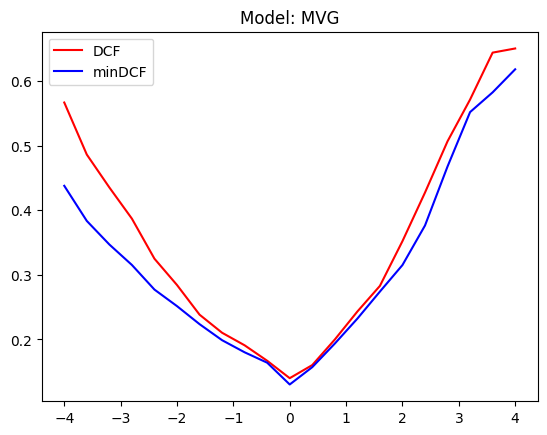

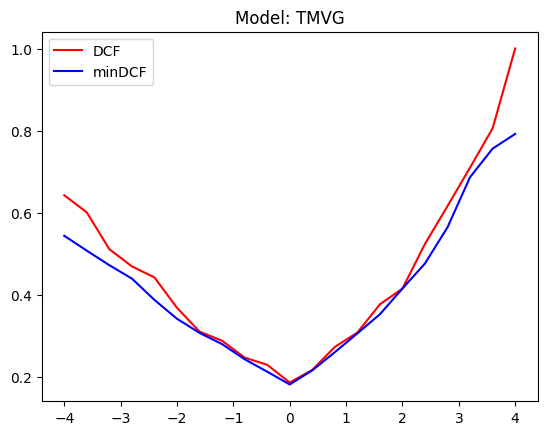

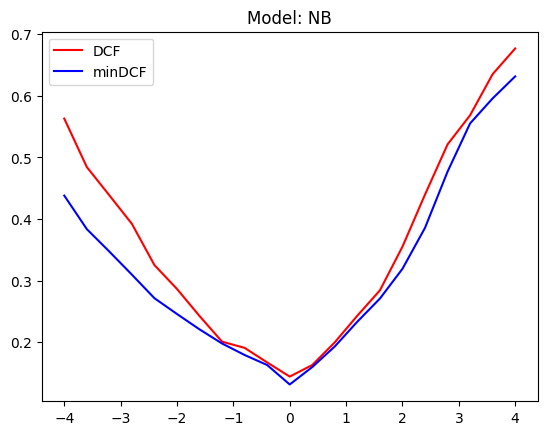

In [114]:


# for prior, Cfn, Cfp in [(0.5, 1.0, 1.0), (0.9, 1.0, 1.0), (0.1, 1.0, 1.0), (0.5, 1.0, 9.0), (0.5, 9.0, 1.0)]:
#     effPriors = (prior * Cfn) / (prior * Cfn + (1 - prior) * Cfp)
#     print(effPriors)

# print()

def compute_confusion_matrix(predictions, labels):
    nClasses = labels.max() + 1
    M = np.zeros((nClasses, nClasses))
    for i in range(labels.size):
        M[predictions[i], labels[i]] += 1
    return M

def compute_optimal_Bayes(llr, prior, Cfn, Cfp):
    thresh = -np.log((prior * Cfn) / ((1 - prior) * Cfp))
    return np.int32(llr > thresh)

def compute_empirical_Bayes_risk(predictions, labels, prior, Cfn, Cfp):
    M = compute_confusion_matrix(predictions, labels)
    Pfn = M[0,1] / (M[0,1] + M[1,1])
    Pfp = M[1,0] / (M[0,0] + M[1,0])
    bayesError = prior * Cfn * Pfn + (1 - prior) * Cfp * Pfp
    return bayesError / np.minimum(prior * Cfn, (1 - prior) * Cfp)
    
def compute_Pfn_Pfp_allThresholds_fast(llr, classLabels):
    llrSorter = np.argsort(llr)
    llrSorted = llr[llrSorter]
    classLabelsSorted = classLabels[llrSorter]

    Pfp = []
    Pfn = []
    
    nTrue = (classLabelsSorted==1).sum()
    nFalse = (classLabelsSorted==0).sum()
    nFalseNegative = 0
    nFalsePositive = nFalse
    
    Pfn.append(nFalseNegative / nTrue)
    Pfp.append(nFalsePositive / nFalse)
    
    for idx in range(len(llrSorted)):
        if classLabelsSorted[idx] == 1:
            nFalseNegative += 1
        if classLabelsSorted[idx] == 0:
            nFalsePositive -= 1
        Pfn.append(nFalseNegative / nTrue)
        Pfp.append(nFalsePositive / nFalse)

    llrSorted = np.concatenate([-np.array([np.inf]), llrSorted])

    PfnOut = []
    PfpOut = []
    thresholdsOut = []
    for idx in range(len(llrSorted)):
        if idx == len(llrSorted) - 1 or llrSorted[idx+1] != llrSorted[idx]:
            PfnOut.append(Pfn[idx])
            PfpOut.append(Pfp[idx])
            thresholdsOut.append(llrSorted[idx])
            
    return np.array(PfnOut), np.array(PfpOut), np.array(thresholdsOut)

def compute_minDCF(llr, classLabels, prior, Cfn, Cfp, returnThreshold=False):

    Pfn, Pfp, th = compute_Pfn_Pfp_allThresholds_fast(llr, classLabels)
    minDCF = (prior * Cfn * Pfn + (1 - prior) * Cfp * Pfp) / np.minimum(prior * Cfn, (1-prior)*Cfp)
    idx = np.argmin(minDCF)
    if returnThreshold:
        return minDCF[idx], th[idx]
    else:
        return minDCF[idx]


import numpy as np
from tabulate import tabulate

def create_comparison_table(priors, Cfn, Cfp, DTR, DVAL, LTR, LVAL):
    global llrsp01

    table_data = []

    bestMinDCF = 9999
    bestModel = ""
    bestPCAdim = 0
    bestPrior = 0
    
    bestMinDCFp01 = 9999
    bestModelp01 = ""
    bestPCAdimp01 = 0

    for prior in priors:
        effPrior = (prior * Cfn) / (prior * Cfn + (1 - prior) * Cfp)

        plt.figure()
        for i in range(6):
            U_pca = PCA(DTR, m=i+1, project=False)
            PCA_DTR = np.dot(U_pca.T, DTR)
            PCA_DVAL = np.dot(U_pca.T, DVAL)
            D_0 = PCA_DTR[:, LTR == 0]
            D_1 = PCA_DTR[:, LTR == 1]
            mu_0 = mcol(D_0.mean(1))
            mu_1 = mcol(D_1.mean(1))
            C_0 = ((D_0 - mu_0) @ (D_0 - mu_0).T) / D_0.shape[1]
            C_1 = ((D_1 - mu_1) @ (D_1 - mu_1).T) / D_1.shape[1]

            # Compute likelihoods for each model
            S_MVG = np.array([
                np.exp(logpdf_GAU_ND(PCA_DVAL, mu_0, C_0)),
                np.exp(logpdf_GAU_ND(PCA_DVAL, mu_1, C_1))
            ])
            S_Tied = np.array([
                np.exp(logpdf_GAU_ND(PCA_DVAL, mu_0, 1/2 * (C_0 + C_1))),
                np.exp(logpdf_GAU_ND(PCA_DVAL, mu_1, 1/2 * (C_0 + C_1)))
            ])
            S_NB = np.array([
                np.exp(logpdf_GAU_ND(PCA_DVAL, mu_0, C_0 * np.eye(C_0.shape[0], C_0.shape[1]))),
                np.exp(logpdf_GAU_ND(PCA_DVAL, mu_1, C_1 * np.eye(C_1.shape[0], C_1.shape[1])))])

            Pc = 1/2
            models = [("MVG", S_MVG), ("TMVG", S_Tied), ("NB", S_NB)]

            for model_name, S in models:
                logSJoint = np.log(S) + mcol(np.log(Pc))
                llrs = logSJoint[1] - logSJoint[0]
                predictions = compute_optimal_Bayes(llrs, effPrior, Cfn, Cfp)
                actDCF = compute_empirical_Bayes_risk(predictions, LVAL, effPrior, 1.0, 1.0)
                minDCF = compute_minDCF(llrs, LVAL, effPrior, 1.0, 1.0)
                perc = actDCF * 100 / minDCF - 100

                if (minDCF < bestMinDCF):
                    bestMinDCF = minDCF
                    bestModel = model_name
                    bestPCAdim = i+1
                    bestPrior = prior

                if (prior == 0.1 and minDCF < bestMinDCFp01):
                    bestMinDCFp01 = minDCF
                    bestModelp01 = model_name
                    bestPCAdimp01 = i+1

                table_data.append([
                    f"{prior:.2f}",
                    i + 1,
                    model_name,
                    f"{minDCF:.4f}",
                    f"{actDCF:.4f}",
                    f"{perc:.2f} %"
                ])


    headers = ["Prior", "PCA Dim", "Model", "Min DCF", "Act DCF", "Perc"]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

    print('Best model:', bestModel, "- PCA:", bestPCAdim, "- Prior:", bestPrior, "with minDCF:", bestMinDCF)
    print('Best model Prior 0.1:', bestModelp01, "- PCA:", bestPCAdimp01, "with minDCF:", bestMinDCFp01)

priors = [0.5, 0.9, 0.1]
Cfn, Cfp = 1.0, 1.0

create_comparison_table(priors, Cfn, Cfp, DTR, DVAL, LTR, LVAL)

# Bayes error plot
effPriorLogOdds = np.linspace(-4, 4, 21)
effPriors = 1.0 / (1.0 + np.exp(-effPriorLogOdds))

D_0 = DTR[:, LTR == 0]
mu_0 = mcol(D_0.mean(1))
C_0 = ((D_0 - mu_0) @ (D_0 - mu_0).T) / D_0.shape[1]

D_1 = DTR[:, LTR == 1]
mu_1 = mcol(D_1.mean(1))
C_1 = ((D_1 - mu_1) @ (D_1 - mu_1).T) / D_1.shape[1]
            
# Compute likelihoods for each model
S_MVG = np.array([
np.exp(logpdf_GAU_ND(DVAL, mu_0, C_0)),
np.exp(logpdf_GAU_ND(DVAL, mu_1, C_1))
])
S_Tied = np.array([
np.exp(logpdf_GAU_ND(DVAL, mu_0, 1/2 * (C_0 + C_1))),
np.exp(logpdf_GAU_ND(DVAL, mu_1, 1/2 * (C_0 + C_1)))
])
S_NB = np.array([
np.exp(logpdf_GAU_ND(DVAL, mu_0, C_0 * np.eye(C_0.shape[0], C_0.shape[1]))),
np.exp(logpdf_GAU_ND(DVAL, mu_1, C_1 * np.eye(C_1.shape[0], C_1.shape[1])))])

Pc = 1/2
models = [("MVG", S_MVG), ("TMVG", S_Tied), ("NB", S_NB)]

priorLog01 = np.log(0.1 / (1.0 - 0.1))
print(priorLog01)

for model_name, S in models:
    logSJoint = np.log(S) + mcol(np.log(Pc))
    llrs = logSJoint[1] - logSJoint[0]
    actDCF = []
    minDCF = []
    for effPrior in effPriors:
        predictions = compute_optimal_Bayes(llrs, effPrior, 1.0, 1.0)
        actDCF.append(compute_empirical_Bayes_risk(predictions, LVAL, effPrior, 1.0, 1.0))
        minDCF.append(compute_minDCF(llrs, LVAL, effPrior, 1.0, 1.0))

    plt.figure()
    plt.title("Model: " + model_name)
    plt.plot(effPriorLogOdds, actDCF, label='DCF', color='r')
    plt.plot(effPriorLogOdds, minDCF, label='minDCF', color='b')
    plt.legend()
    plt.show()


# Part 8

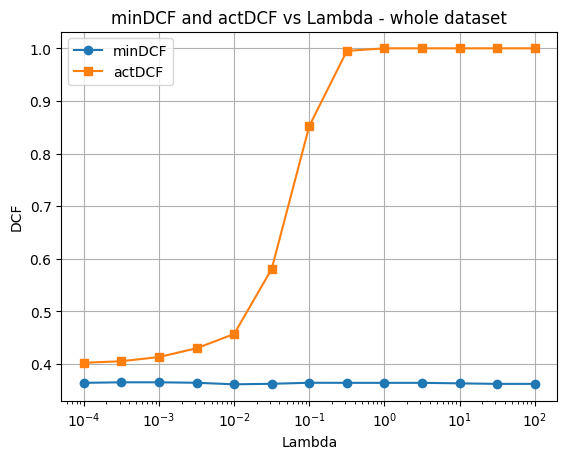

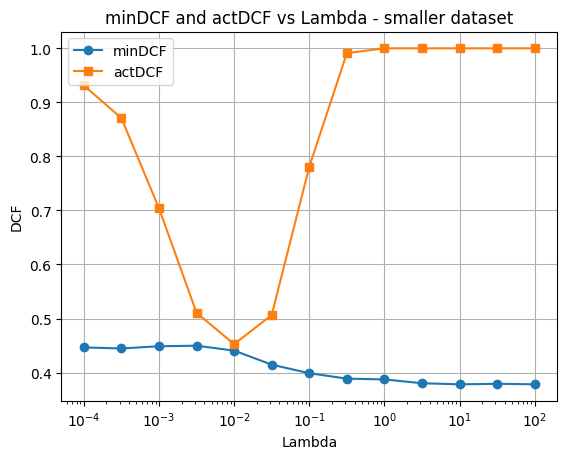

Weighted Log-reg (pT 1.000000e-01) - lambda = 1.000000e-04 - J*(w, b) = 1.295710e-01
Weighted Log-reg (pT 1.000000e-01) - lambda = 3.162278e-04 - J*(w, b) = 1.307709e-01
Weighted Log-reg (pT 1.000000e-01) - lambda = 1.000000e-03 - J*(w, b) = 1.343060e-01
Weighted Log-reg (pT 1.000000e-01) - lambda = 3.162278e-03 - J*(w, b) = 1.436651e-01
Weighted Log-reg (pT 1.000000e-01) - lambda = 1.000000e-02 - J*(w, b) = 1.642912e-01
Weighted Log-reg (pT 1.000000e-01) - lambda = 3.162278e-02 - J*(w, b) = 2.002131e-01
Weighted Log-reg (pT 1.000000e-01) - lambda = 1.000000e-01 - J*(w, b) = 2.473025e-01
Weighted Log-reg (pT 1.000000e-01) - lambda = 3.162278e-01 - J*(w, b) = 2.889006e-01
Weighted Log-reg (pT 1.000000e-01) - lambda = 1.000000e+00 - J*(w, b) = 3.117064e-01
Weighted Log-reg (pT 1.000000e-01) - lambda = 3.162278e+00 - J*(w, b) = 3.206240e-01
Weighted Log-reg (pT 1.000000e-01) - lambda = 1.000000e+01 - J*(w, b) = 3.236489e-01
Weighted Log-reg (pT 1.000000e-01) - lambda = 3.162278e+01 - J*(w

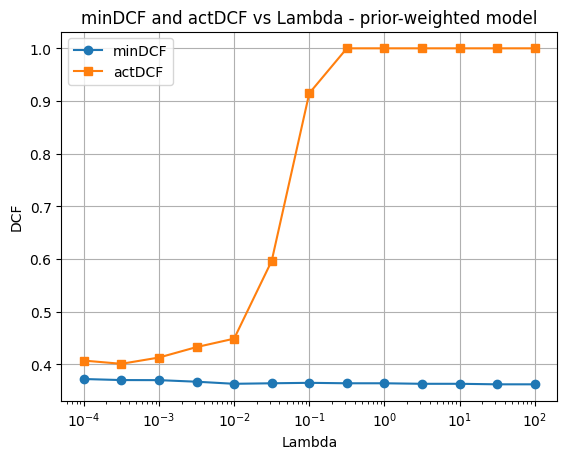

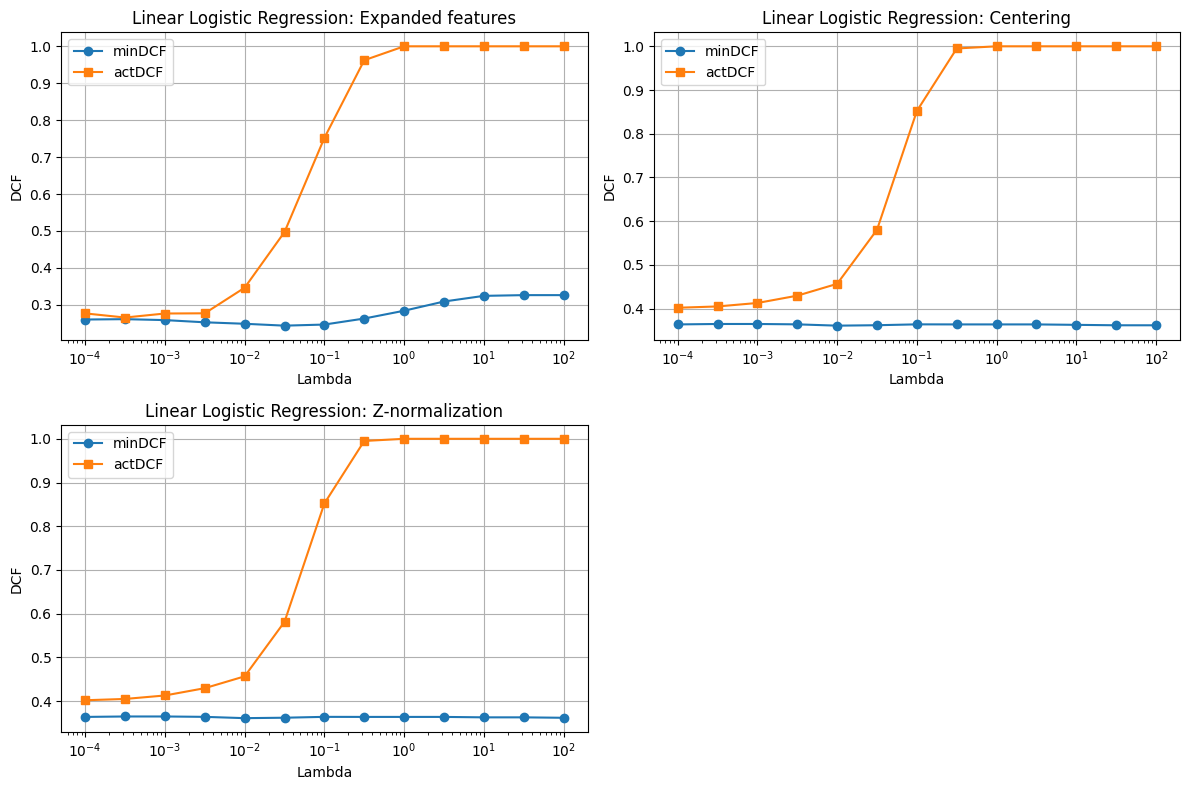

In [133]:

def trainLogReg(DTR, LTR, l):

    ZTR = 2.0 * LTR - 1.0
    def logreg_obj(v):
        w, b = v[:-1], v[-1]
        S = np.dot(mcol(w).T, DTR).ravel() + b

        loss = np.logaddexp(0, -ZTR * S)

        G = - ZTR / (1.0 + np.exp(ZTR * S))
        GW = (mrow(G) * DTR).mean(1) + l * w.ravel()
        Gb = G.mean()
        return loss.mean() + l / 2 * np.linalg.norm(w)**2, np.hstack([GW, np.array(Gb)])

    x0 = np.zeros(DTR.shape[0] + 1)
    vf, _, _ = scipy.optimize.fmin_l_bfgs_b(func=logreg_obj, x0=x0, approx_grad=False)
    return vf[:-1], vf[-1]

def trainWeightedLogRegBinary(DTR, LTR, l, pT):

    ZTR = LTR * 2.0 - 1.0
    
    wTrue = pT / (ZTR>0).sum()
    wFalse = (1-pT) / (ZTR<0).sum()

    def logreg_obj_with_grad(v):
        w = v[:-1]
        b = v[-1]
        s = np.dot(mcol(w).T, DTR).ravel() + b

        loss = np.logaddexp(0, -ZTR * s)
        loss[ZTR>0] *= wTrue
        loss[ZTR<0] *= wFalse

        G = -ZTR / (1.0 + np.exp(ZTR * s))
        G[ZTR > 0] *= wTrue
        G[ZTR < 0] *= wFalse
        
        GW = (mrow(G) * DTR).sum(1) + l * w.ravel()
        Gb = G.sum()
        return loss.sum() + l / 2 * np.linalg.norm(w)**2, np.hstack([GW, np.array(Gb)])

    vf = scipy.optimize.fmin_l_bfgs_b(logreg_obj_with_grad, x0 = np.zeros(DTR.shape[0]+1))[0]
    print ("Weighted Log-reg (pT %e) - lambda = %e - J*(w, b) = %e" % (pT, l, logreg_obj_with_grad(vf)[0]))
    return vf[:-1], vf[-1]

def expand_features(DTR, DVAL):
    _, N = DTR.shape
    quad_terms = np.array([np.outer(DTR[:, i], DTR[:, i]).reshape(-1) for i in range(N)]).T
    DTR_expanded = np.vstack([quad_terms, DTR])
    
    _, N = DVAL.shape
    quad_terms = np.array([np.outer(DVAL[:, i], DVAL[:, i]).reshape(-1) for i in range(N)]).T
    DVAL_expanded = np.vstack([quad_terms, DVAL])
    return DTR_expanded, DVAL_expanded

def center_data(DTR, DVAL):
    mean = DTR.mean(axis=1, keepdims=True)
    DTR_centered = DTR - mean
    DVAL_centered = DVAL - mean
    return DTR_centered, DVAL_centered

def z_normalize_data(DTR, DVAL):
    mean = DTR.mean(axis=1, keepdims=True)
    std = DTR.std(axis=1, keepdims=True)
    DTR_normalized = (DTR - mean) / std
    DVAL_normalized = (DVAL - mean) / std
    return DTR_normalized, DVAL_normalized

def evaluate_model(DTR, LTR, DVAL, LVAL, preprocessing_func=None):
    lambdas = np.logspace(-4, 2, 13)
    minDCF = []
    actDCF = []
    
    if preprocessing_func:
        DTR_proc, DVAL_proc = preprocessing_func(DTR, DVAL)
    else:
        DTR_proc, DVAL_proc = DTR, DVAL
    
    for lamb in lambdas:
        w, b = trainLogReg(DTR_proc, LTR, lamb)
        scores = np.dot(w.T, DVAL_proc) + b
        
        pEmp = (LTR == 1).sum() / LTR.size
        adjusted_scores = scores - np.log(pEmp / (1 - pEmp))
        
        minDCF.append(compute_minDCF(adjusted_scores, LVAL, 0.1, 1.0, 1.0))
        actDCF.append(compute_empirical_Bayes_risk(compute_optimal_Bayes(adjusted_scores, 0.1, 1.0, 1.0), LVAL, 0.1, 1.0, 1.0))
    
    return lambdas, minDCF, actDCF

plt.figure()
plt.xscale('log', base=10)
minDCF = []
actDCF = []
lambdas = np.logspace(-4, 2, 13)

for lamb in lambdas:
    w, b = trainLogReg(DTR, LTR, lamb)
    scores = np.dot(w.T, DVAL) + b
    
    # Empirical prior from training set
    pEmp = (LTR == 1).sum() / LTR.size
    
    # Remove the log-odds of the training set empirical prior
    adjusted_scores = scores - np.log(pEmp / (1 - pEmp))
    
    minDCF.append(compute_minDCF(adjusted_scores, LVAL, 0.1, 1.0, 1.0))
    actDCF.append(compute_empirical_Bayes_risk(compute_optimal_Bayes(adjusted_scores, 0.1, 1.0, 1.0), LVAL, 0.1, 1.0, 1.0))

plt.plot(lambdas, minDCF, label="minDCF", marker='o')
plt.plot(lambdas, actDCF, label="actDCF", marker='s')
plt.xlabel("Lambda")
plt.ylabel("DCF")
plt.title("minDCF and actDCF vs Lambda - whole dataset")
plt.legend()
plt.grid(True)
plt.show()

# Use less training examples
plt.figure()
plt.xscale('log', base=10)
minDCF = []
actDCF = []
lambdas = np.logspace(-4, 2, 13)

for lamb in lambdas:
    w, b = trainLogReg(DTR[:, ::50], LTR[::50], lamb)
    scores = np.dot(w.T, DVAL) + b
    
    # Empirical prior from training set
    pEmp = (LTR == 1).sum() / LTR.size
    
    # Remove the log-odds of the training set empirical prior
    adjusted_scores = scores - np.log(pEmp / (1 - pEmp))
    
    minDCF.append(compute_minDCF(adjusted_scores, LVAL, 0.1, 1.0, 1.0))
    actDCF.append(compute_empirical_Bayes_risk(compute_optimal_Bayes(adjusted_scores, 0.1, 1.0, 1.0), LVAL, 0.1, 1.0, 1.0))

plt.plot(lambdas, minDCF, label="minDCF", marker='o')
plt.plot(lambdas, actDCF, label="actDCF", marker='s')
plt.xlabel("Lambda")
plt.ylabel("DCF")
plt.title("minDCF and actDCF vs Lambda - smaller dataset")
plt.legend()
plt.grid(True)
plt.show()

# Prior-weighted version of the model
plt.figure()
plt.xscale('log', base=10)
minDCF = []
actDCF = []
lambdas = np.logspace(-4, 2, 13)

for lamb in lambdas:
    pT = 0.1
    w, b = trainWeightedLogRegBinary(DTR, LTR, lamb, pT = pT)
    scores = np.dot(w.T, DVAL) + b
    
    # Remove the log-odds of the training set empirical prior
    adjusted_scores = scores - np.log(pT / (1 - pT))
    
    minDCF.append(compute_minDCF(adjusted_scores, LVAL, 0.1, 1.0, 1.0))
    actDCF.append(compute_empirical_Bayes_risk(compute_optimal_Bayes(adjusted_scores, 0.1, 1.0, 1.0), LVAL, 0.1, 1.0, 1.0))

plt.plot(lambdas, minDCF, label="minDCF", marker='o')
plt.plot(lambdas, actDCF, label="actDCF", marker='s')
plt.xlabel("Lambda")
plt.ylabel("DCF")
plt.title("minDCF and actDCF vs Lambda - prior-weighted model")
plt.legend()
plt.grid(True)
plt.show()

results = {
    'Expanded features': evaluate_model(DTR, LTR, DVAL, LVAL, expand_features),
    'Centering': evaluate_model(DTR, LTR, DVAL, LVAL, center_data),
    'Z-normalization': evaluate_model(DTR, LTR, DVAL, LVAL, z_normalize_data)
}

# Plotting results
plt.figure(figsize=(12, 8))
for i, (name, (lambdas, minDCF, actDCF)) in enumerate(results.items()):
    plt.subplot(2, 2, i+1)
    plt.semilogx(lambdas, minDCF, label='minDCF', marker='o')
    plt.semilogx(lambdas, actDCF, label='actDCF', marker='s')
    plt.title(f'Linear Logistic Regression: {name}')
    plt.xlabel('Lambda')
    plt.ylabel('DCF')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
